### Lenear Regression usign Gradient Descent

In this post I am going to write Gradient Descent code in Python from scratch.

In [175]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
df = pd.DataFrame(data = boston.data)
df.columns = boston.feature_names
df['target'] = boston.target

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
corr = df.corr()
corr['target'].sort_values(ascending =False)

target     1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [19]:
# just checking absolute value because in previous cell we see some -ve correlation
corr_values = corr['target'].abs().sort_values(ascending = False)
corr_values

target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [20]:
y = preprocessing.scale(df['target'])
x = df.drop('target', 1)
# Standardize all column
x = preprocessing.scale(x)

In [142]:
x_uni= df['LSTAT']
y=df['target']
x_uni = (x_uni - x_uni.mean()) / x_uni.std()
x_uni = np.c_[np.ones(x_uni.shape[0]), x_uni] 

In [143]:
y.shape, x_uni.shape

((506,), (506, 2))

### Gradient Descent implementation in python

In [191]:
def gradient_descent(x, y, epoch,alpha, theta):
    cost_list = []
    prediction_list = []
    n = float(len(y))
    for i in range(epoch):
        prediction = np.dot(x, theta)
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*n) * np.dot(error.T, error)
        cost_list.append(cost)
        theta = theta - (alpha * (1/n) * np.dot(x.T, error))
    return cost, theta, cost_list, prediction_list

In [192]:
epoch = 1000
alpha = 0.01
theta = np.random.rand(2)
cost, theta, cost_list, pred_list= gradient_descent(x_uni, y, epoch, alpha, theta)

In [193]:
theta

array([22.53185074, -6.78402958])

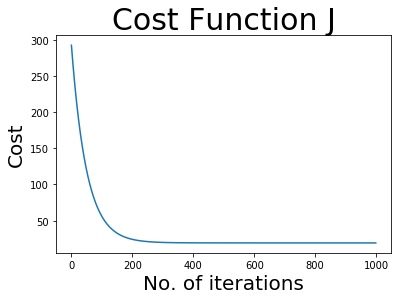

In [194]:
# ploting cost values for each epoch
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

### for multi variable linear regression

In [167]:
y=df['target']
x= df.drop('target', axis=1)
x= preprocessing.scale(x)
#x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]

In [168]:
x.shape

(506, 14)

In [195]:
np.random.seed(123) #Set the seed
theta = np.random.rand(14)
theta

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
       0.34317802, 0.72904971, 0.43857224, 0.0596779 ])

In [197]:
epoch = 10000
alpha = 0.01
cost, theta, cost_list, pred_list= gradient_descent(x, y, epoch, alpha, theta)

In [198]:
theta

array([ 2.25328063e+01, -9.27881618e-01,  1.08110297e+00,  1.39455174e-01,
        6.81946434e-01, -2.05646707e+00,  2.67449240e+00,  1.92442068e-02,
       -3.10414948e+00,  2.65857223e+00, -2.07263716e+00, -2.06047199e+00,
        8.49242741e-01, -3.74348653e+00])

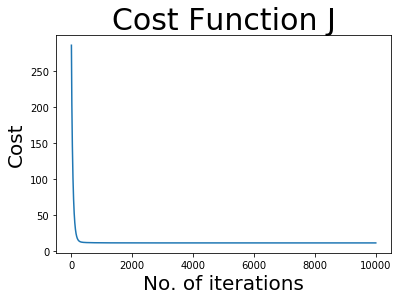

In [199]:
# ploting cost values for each epoch
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [200]:
# Y predict
y_pred = np.dot(x, theta)

In [202]:
# Mean square of residuals
MSE_GD = ((pred_list[-1]-y)**2).mean()  #From Gradient Descent
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error from Gradient Descent prediction : 21.895


### Using scikit learn

In [203]:
lr = LinearRegression()

#Fitting the model
lr = lr.fit(x,y)

In [179]:
lr_pred = lr.predict(x)

In [181]:
lr_pred.shape

(506,)

In [183]:
lm.coef_

array([ 0.        , -0.92814606,  1.08156863,  0.1409    ,  0.68173972,
       -2.05671827,  2.67423017,  0.01946607, -3.10404426,  2.66221764,
       -2.07678168, -2.06060666,  0.84926842, -3.74362713])

In [208]:
### Model performance
r2_sk = lm.score(x,y)
print('R square from scikit learn: {}'.format(round(r2_sk,4)))

R square from scikit learn: 0.7406


In [209]:
r2 = 1 - (sum((y - pred_list[-1])**2)) / (sum((y - y.mean())**2))
print('R square doing from the scratch: {}'.format(round(r2,4)))

R square doing from the scratch: 0.7406
